In [1]:
import skimage
import cv2
import numpy as np
import pandas as pd
from skimage import feature
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

# Read image

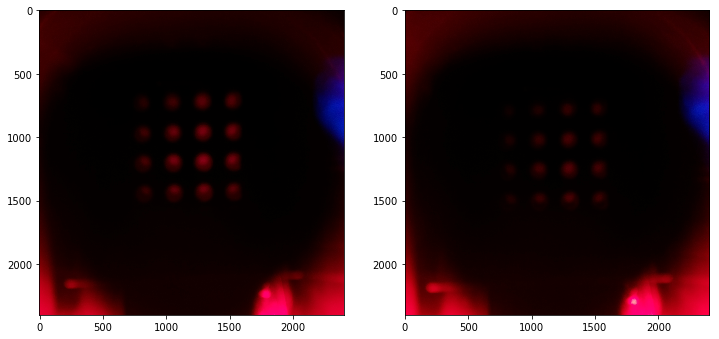

In [2]:
img = np.array(Image.open('32w_4th_RTtest_data/1/44_0_1.jpg'))
img2 = np.array(Image.open('32w_4th_RTtest_data/1/0_0_1.jpg'))
fig, ax = plt.subplots(1, 2, figsize=(12, 24))
ax[0].imshow(img)
ax[1].imshow(img2)

In [8]:
im_li = [img[x_range, y_range], img2[x_range, y_range]]

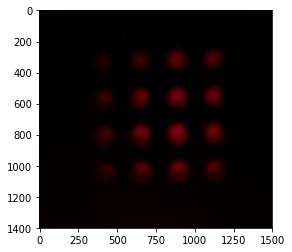

In [81]:
plt.imshow(im_li[0])

# Convert to gray scale

In [4]:
im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [7]:
im_gray = [im[x_range, y_range], im2[x_range, y_range]]

Text(0.5,1,'1st')

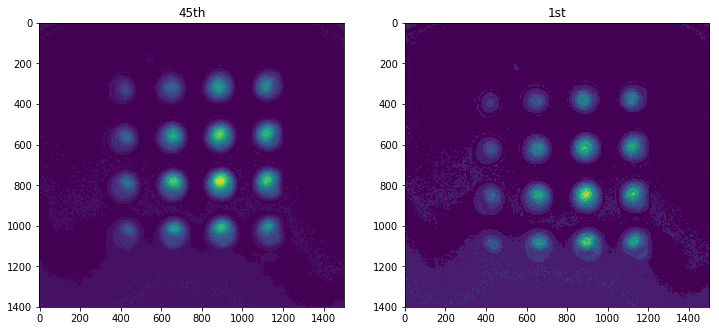

In [6]:
x_range = slice(400, 1800)
y_range = slice(400, 1900)
    
fig, ax = plt.subplots(1, 2, figsize=(12, 24))
ax[0].imshow(im[x_range, y_range])
ax[0].set_title('45th')
ax[1].imshow(im2[x_range, y_range])
ax[1].set_title('1st')

# Threshholding the images

In [9]:
im_cropped = im[x_range, y_range]
im2_cropped = im2[x_range, y_range]

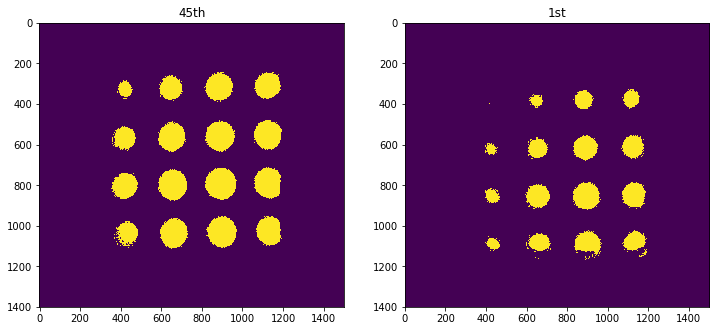

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(12, 24))
title = ['45th', '1st']
x = 0
threshed_im = []
for i in [im_cropped, im2_cropped]:
    thresh = skimage.filters.threshold_triangle(i)
    filtered_im = i > thresh
    threshed_im.append(filtered_im)
    ax[x].imshow(filtered_im)
    ax[x].set_title(title[x])
    x += 1

# Morphological prcessing

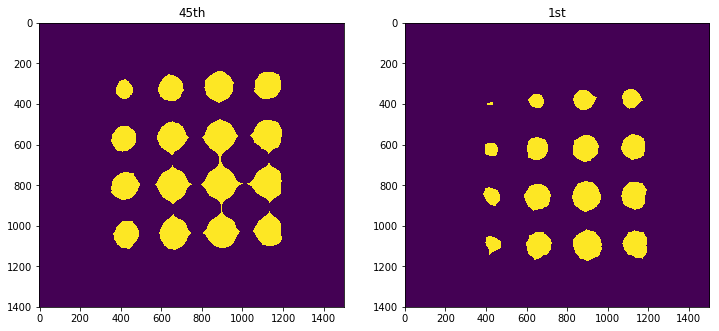

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 24))
for i in range(2):
    bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.disk(50))
#     bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.square(3))
    cleared = skimage.segmentation.clear_border(bw)
    ax[i].imshow(cleared)
    ax[i].set_title(title[i])

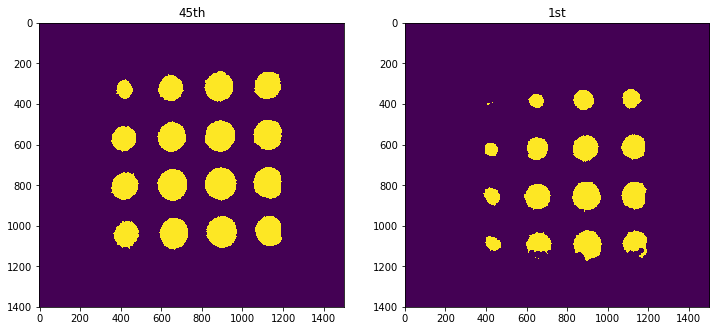

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 24))
for i in range(2):
    bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.disk(10))
#     bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.square(3))
    cleared = skimage.segmentation.clear_border(bw)
    ax[i].imshow(cleared)
    ax[i].set_title(title[i])

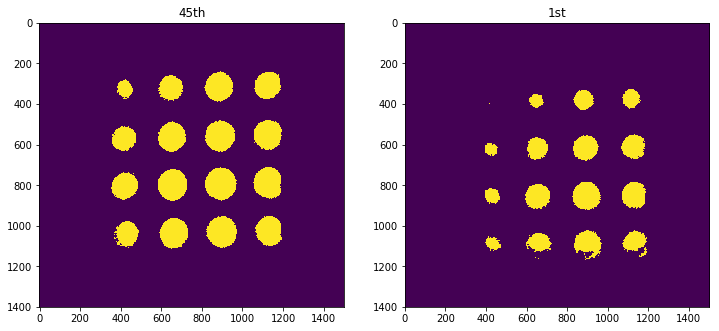

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 24))
for i in range(2):
    bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.disk(3))
#     bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.square(3))
    cleared = skimage.segmentation.clear_border(bw)
    ax[i].imshow(cleared)
    ax[i].set_title(title[i])

# Recognize objects

In [96]:
colors_li = [plt.cm.get_cmap('hsv', 30)(i) for i in range(30)]

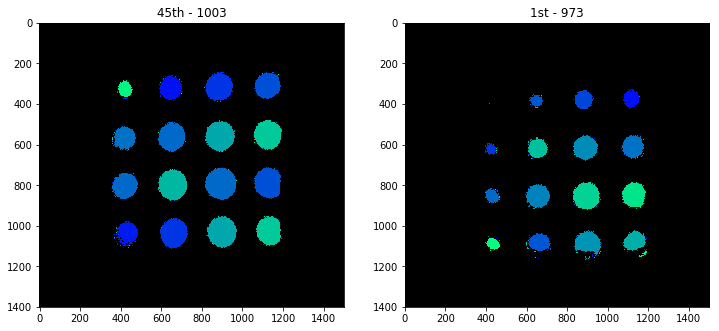

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 24))
im_labeled = []
for i in range(2):
    label_image = skimage.measure.label(threshed_im[i])
    im_labeled.append(label_image)
    image_label_overlay = skimage.color.label2rgb(label_image, bg_label=0, colors=colors)
    ax[i].imshow(image_label_overlay)
    ax[i].set_title(f'{title[i]} - {label_image.max()}')

In [48]:
list(range(1,10,2))

[1, 3, 5, 7, 9]

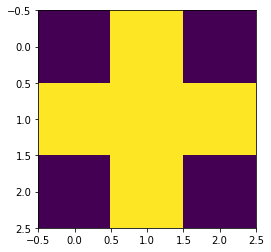

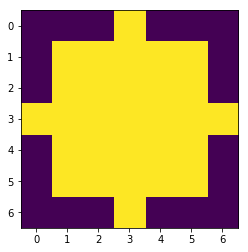

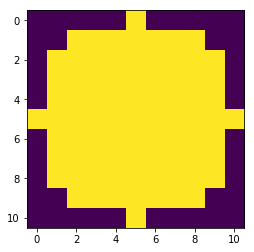

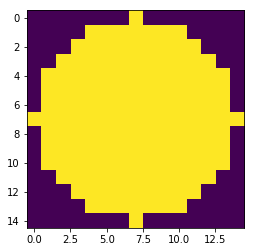

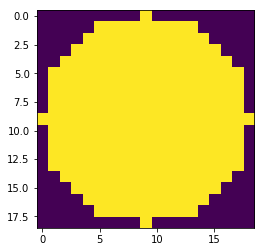

In [50]:
for i in range(1,10,2):
    plt.figure()
    plt.imshow(skimage.morphology.disk(i))

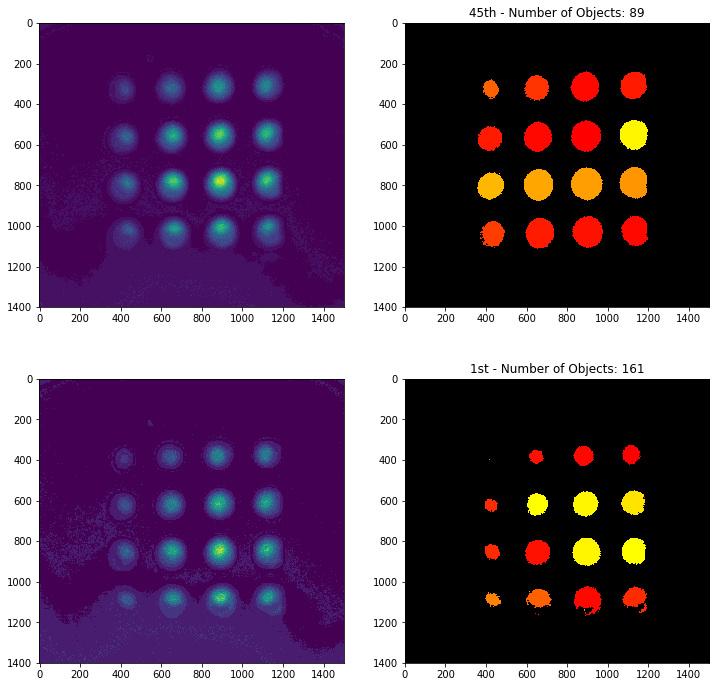

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.disk(3))
    cleared = skimage.segmentation.clear_border(bw)
    label_image = skimage.measure.label(cleared)
    im_labeled.append(label_image)
    image_label_overlay = skimage.color.label2rgb(label_image, bg_label=0, colors=colors_li)
    ax[i][1].set_title(f'{title[i]} - Number of Objects: {label_image.max()}')
    ax[i][1].imshow(image_label_overlay)
    ax[i][0].imshow(im_gray[i])


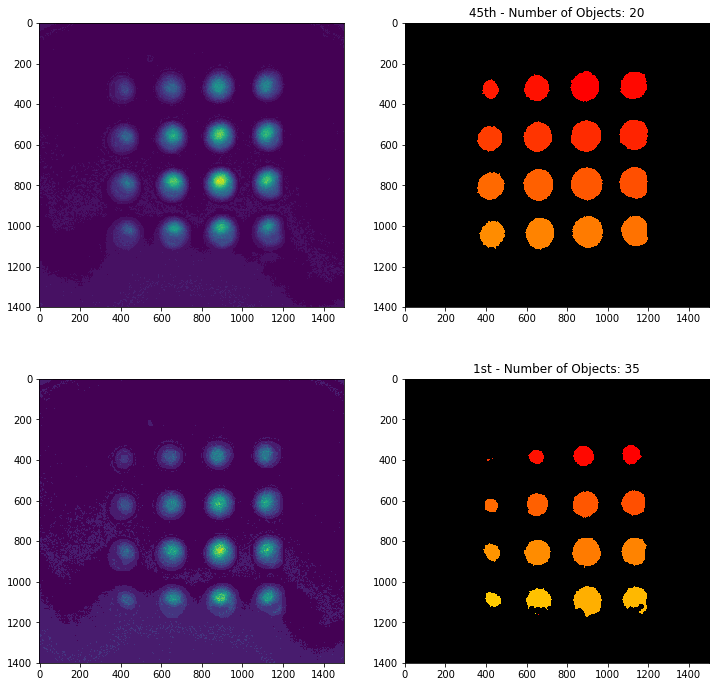

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for i in range(2):
    bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.disk(10))
    cleared = skimage.segmentation.clear_border(bw)
    label_image = skimage.measure.label(cleared)
    im_labeled.append(label_image)
    image_label_overlay = skimage.color.label2rgb(label_image, bg_label=0, colors=colors_li)
    ax[i][1].set_title(f'{title[i]} - Number of Objects: {label_image.max()}')
    ax[i][1].imshow(image_label_overlay)
    ax[i][0].imshow(im_gray[i])


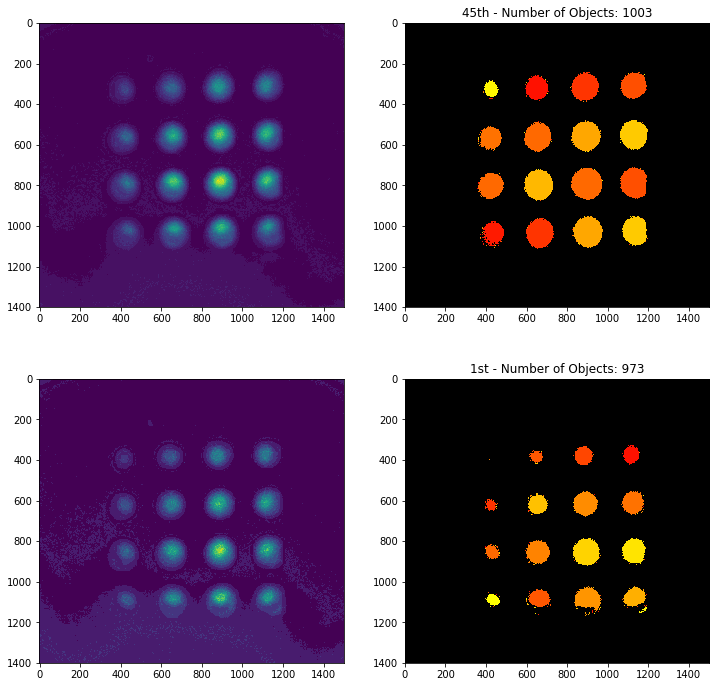

In [73]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
im_labeled = []
for i in range(2):
    label_image = skimage.measure.label(threshed_im[i])
    im_labeled.append(label_image)
    image_label_overlay = skimage.color.label2rgb(label_image, bg_label=0, colors=colors_li)
    ax[i][1].set_title(f'{title[i]} - Number of Objects: {label_image.max()}')
    ax[i][1].imshow(image_label_overlay)
    ax[i][0].imshow(im_gray[i])

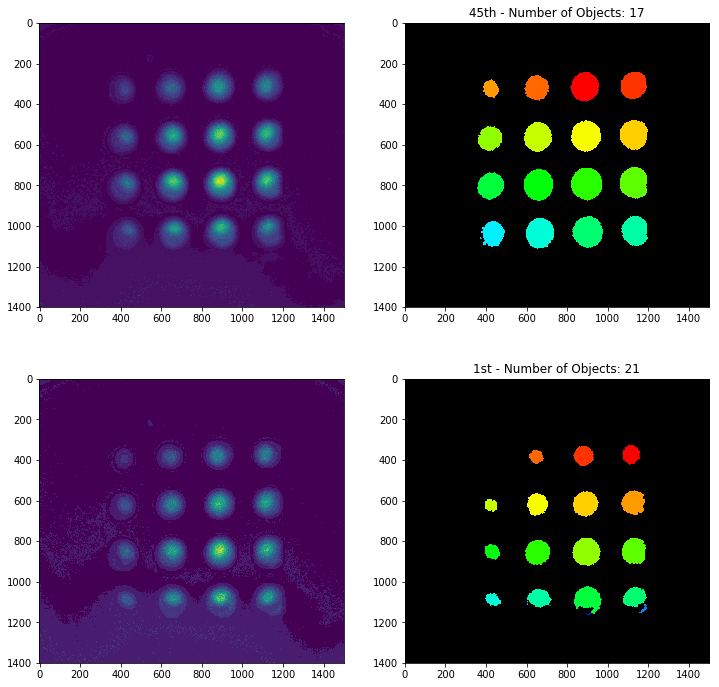

In [139]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
im_labeled = []
for i in range(2):
    bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.disk(3))
    bw2 = skimage.morphology.opening(bw, skimage.morphology.disk(3))
    cleared = skimage.segmentation.clear_border(bw2)
    label_image = skimage.measure.label(cleared)
    image_label_overlay = skimage.color.label2rgb(label_image, bg_label=0, colors=colors_li)
    im_labeled.append([label_image, image_label_overlay])
    ax[i][1].set_title(f'{title[i]} - Number of Objects: {label_image.max()}')
    ax[i][1].imshow(image_label_overlay)
    ax[i][0].imshow(im_gray[i])


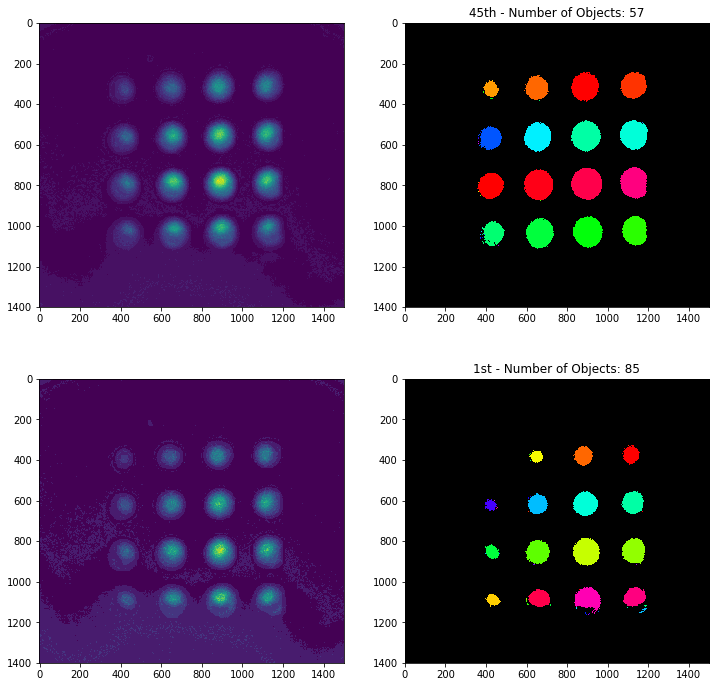

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
im_labeled = []
for i in range(2):
    bw = skimage.morphology.closing(threshed_im[i], skimage.morphology.disk(1))
    bw2 = skimage.morphology.opening(bw, skimage.morphology.disk(1))
    cleared = skimage.segmentation.clear_border(bw2)
    label_image = skimage.measure.label(cleared)
    image_label_overlay = skimage.color.label2rgb(label_image, bg_label=0, colors=colors_li)
#     im_labeled.append([label_image, image_label_overlay])
    ax[i][1].set_title(f'{title[i]} - Number of Objects: {label_image.max()}')
    ax[i][1].imshow(image_label_overlay)
    ax[i][0].imshow(im_gray[i])


# 값 산정

## 1. 45th cycle

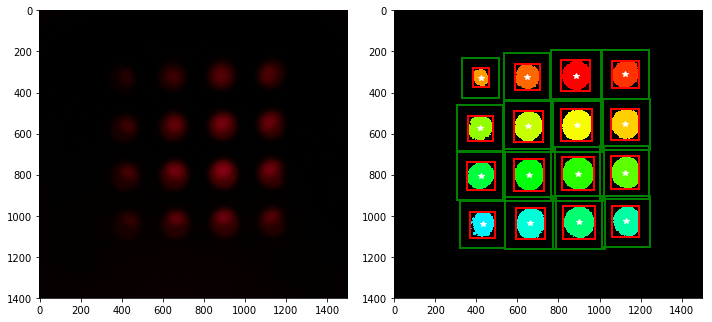

In [140]:
fig, ax = plt.subplots(1, 2, figsize=(10, 12))
# ax[0].imshow(im_li[0], interpolation='nearest', cmap=plt.cm.gray)
ax[0].imshow(im_li[0])
ax[1].imshow(im_labeled[0][1])
region_li = []
i = 0
j = 1
row = list('ABCD')
region_raw = []
for region in skimage.measure.regionprops(im_labeled[0][0], intensity_image=im_gray[0]):
    # take regions with large enough areas
    region_raw.append(region)
    if 100 <= region.area < 30000:
        # draw rectangle around segmented coins
        region_li.append(region)
        minr, minc, maxr, maxc = region.bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        ax[1].add_patch(rect)
        rect2 = matplotlib.patches.Rectangle((minc-50, minr-50), maxc - minc+100, maxr - minr+100, fill=False, edgecolor='green', linewidth=2)
        ax[1].add_patch(rect2)
        ax[1].plot(region.centroid[1], region.centroid[0], color='white', marker='*')
#         plt.text(region.centroid[1], region.centroid[0], row[i]+str(j), color='gray')
#         if row[i] == 'D':
#             i = 0
#             j += 1
#         else:
#             i += 1

plt.tight_layout()
plt.show()

In [141]:
len(region_li)

16

In [142]:
len(region_raw)

17

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 0., 2., 1., 1., 0., 1., 2., 1., 0., 0., 1.]),
 array([   72.  ,   454.64,   837.28,  1219.92,  1602.56,  1985.2 ,
         2367.84,  2750.48,  3133.12,  3515.76,  3898.4 ,  4281.04,
         4663.68,  5046.32,  5428.96,  5811.6 ,  6194.24,  6576.88,
         6959.52,  7342.16,  7724.8 ,  8107.44,  8490.08,  8872.72,
         9255.36,  9638.  , 10020.64, 10403.28, 10785.92, 11168.56,
        11551.2 , 11933.84, 12316.48, 12699.12, 13081.76, 13464.4 ,
        13847.04, 14229.68, 14612.32, 14994.96, 15377.6 , 15760.24,
        16142.88, 16525.52, 16908.16, 17290.8 , 17673.44, 18056.08,
        18438.72, 18821.36, 19204.  ]),
 <a list of 50 Patch objects>)

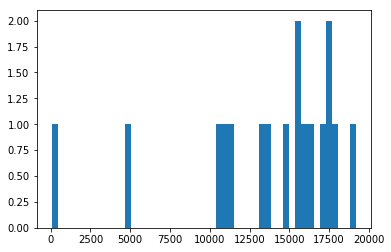

In [143]:
region_area = [region.area for region in region_raw]
plt.hist(region_area, bins=50)

Text(0.5,1,'Min')

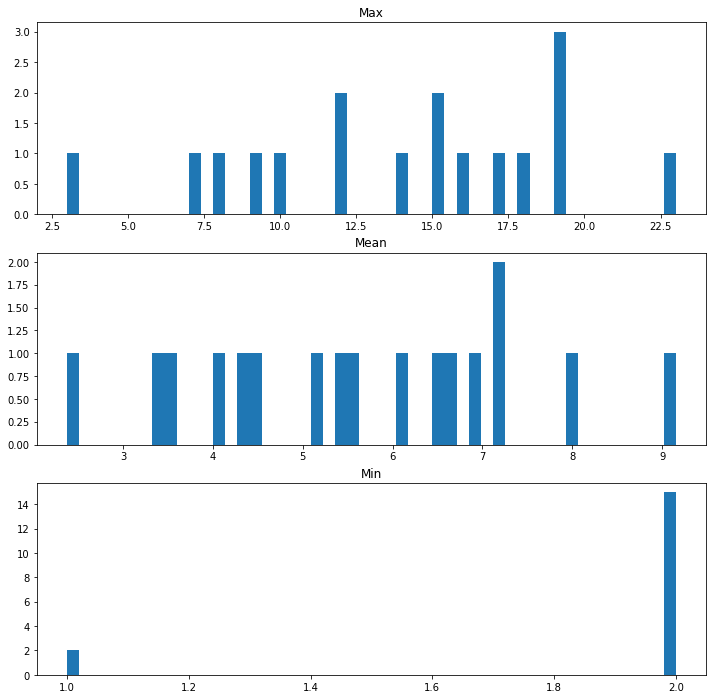

In [144]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))
region_max_intensity = [region.max_intensity for region in region_raw]
ax[0].hist(region_max_intensity, bins=50)
ax[0].set_title('Max')
region_mean_intensity  = [region.mean_intensity  for region in region_raw]
ax[1].hist(region_mean_intensity, bins=50)
ax[1].set_title('Mean')
region_min_intensity = [region.min_intensity for region in region_raw]
ax[2].hist(region_min_intensity, bins=50)
ax[2].set_title('Min')

## 2. 1st cycle

### well별 구역 정보

In [145]:
well_location_key = []
for r in range(1, 5):
    for c in list('ABCD')[::-1]:
        well_location_key.append(c+str(r))
well_location_key

['D1',
 'C1',
 'B1',
 'A1',
 'D2',
 'C2',
 'B2',
 'A2',
 'D3',
 'C3',
 'B3',
 'A3',
 'D4',
 'C4',
 'B4',
 'A4']

In [149]:
cent_li = []
for r in region_li:
    y, x = r.centroid
    cent_li.append([x//100, y//100, region_li.index(r)])
cent_li.sort()
cent_li

[[4.0, 3.0, 3],
 [4.0, 5.0, 7],
 [4.0, 8.0, 11],
 [4.0, 10.0, 15],
 [6.0, 3.0, 2],
 [6.0, 5.0, 6],
 [6.0, 7.0, 10],
 [6.0, 10.0, 14],
 [8.0, 3.0, 0],
 [8.0, 5.0, 5],
 [8.0, 7.0, 9],
 [8.0, 10.0, 12],
 [11.0, 3.0, 1],
 [11.0, 5.0, 4],
 [11.0, 7.0, 8],
 [11.0, 10.0, 13]]

In [168]:
well_location_dict = {}
for i in range(len(well_location_key)):
    key = well_location_key[i]
    region = region_li[cent_li[i][2]]
    minr, minc, maxr, maxc = region.bbox
    well_location_dict[key] = [minr-50, minc-50, maxr+50, maxc+50]
    
well_location_dict

{'D1': [231, 332, 425, 512],
 'C1': [462, 308, 686, 529],
 'B1': [688, 305, 925, 539],
 'A1': [930, 321, 1156, 541],
 'D2': [209, 537, 437, 760],
 'C2': [439, 533, 689, 774],
 'B2': [673, 532, 930, 781],
 'A2': [910, 542, 1164, 786],
 'D3': [193, 763, 441, 1006],
 'C3': [432, 764, 688, 1015],
 'B3': [664, 765, 927, 1021],
 'A3': [902, 773, 1162, 1027],
 'D4': [195, 1010, 430, 1240],
 'C4': [431, 1005, 680, 1244],
 'B4': [661, 1004, 919, 1242],
 'A4': [902, 1013, 1152, 1244]}

In [169]:
def get_well_loc(x, y):
    for well in well_location_dict.keys():
        y_min, x_min, y_max, x_max = well_location_dict[well]
        if y_min < y < y_max and x_min < x < x_max:
            return well

In [170]:
region_raw2 = []
region_raw_dict = {}
for region in skimage.measure.regionprops(im_labeled[1][0], intensity_image=im_gray[1]):
    # take regions with large enough areas
    region_raw2.append(region)
    region_raw_dict[region.area] = region
region_raw_dict

{6286: <skimage.measure._regionprops._RegionProperties at 0x17e80959eb8>,
 7421: <skimage.measure._regionprops._RegionProperties at 0x17e8090bb00>,
 3552: <skimage.measure._regionprops._RegionProperties at 0x17e80204160>,
 10545: <skimage.measure._regionprops._RegionProperties at 0x17e802401d0>,
 11971: <skimage.measure._regionprops._RegionProperties at 0x17e80961160>,
 8558: <skimage.measure._regionprops._RegionProperties at 0x17e80961048>,
 2986: <skimage.measure._regionprops._RegionProperties at 0x17e80961208>,
 14919: <skimage.measure._regionprops._RegionProperties at 0x17e80961128>,
 12239: <skimage.measure._regionprops._RegionProperties at 0x17e809610f0>,
 11738: <skimage.measure._regionprops._RegionProperties at 0x17e80961080>,
 4343: <skimage.measure._regionprops._RegionProperties at 0x17e80961198>,
 12183: <skimage.measure._regionprops._RegionProperties at 0x17e80961278>,
 8357: <skimage.measure._regionprops._RegionProperties at 0x17e8088bc18>,
 7661: <skimage.measure._regionp

In [171]:
sorted_region_key = list(region_raw_dict.keys())
sorted_region_key.sort(reverse=True)
sorted_region_key

[14919,
 12239,
 12183,
 11971,
 11738,
 10545,
 8558,
 8357,
 7661,
 7421,
 6286,
 4343,
 3552,
 3409,
 2986,
 646,
 102,
 55,
 46,
 41,
 29]

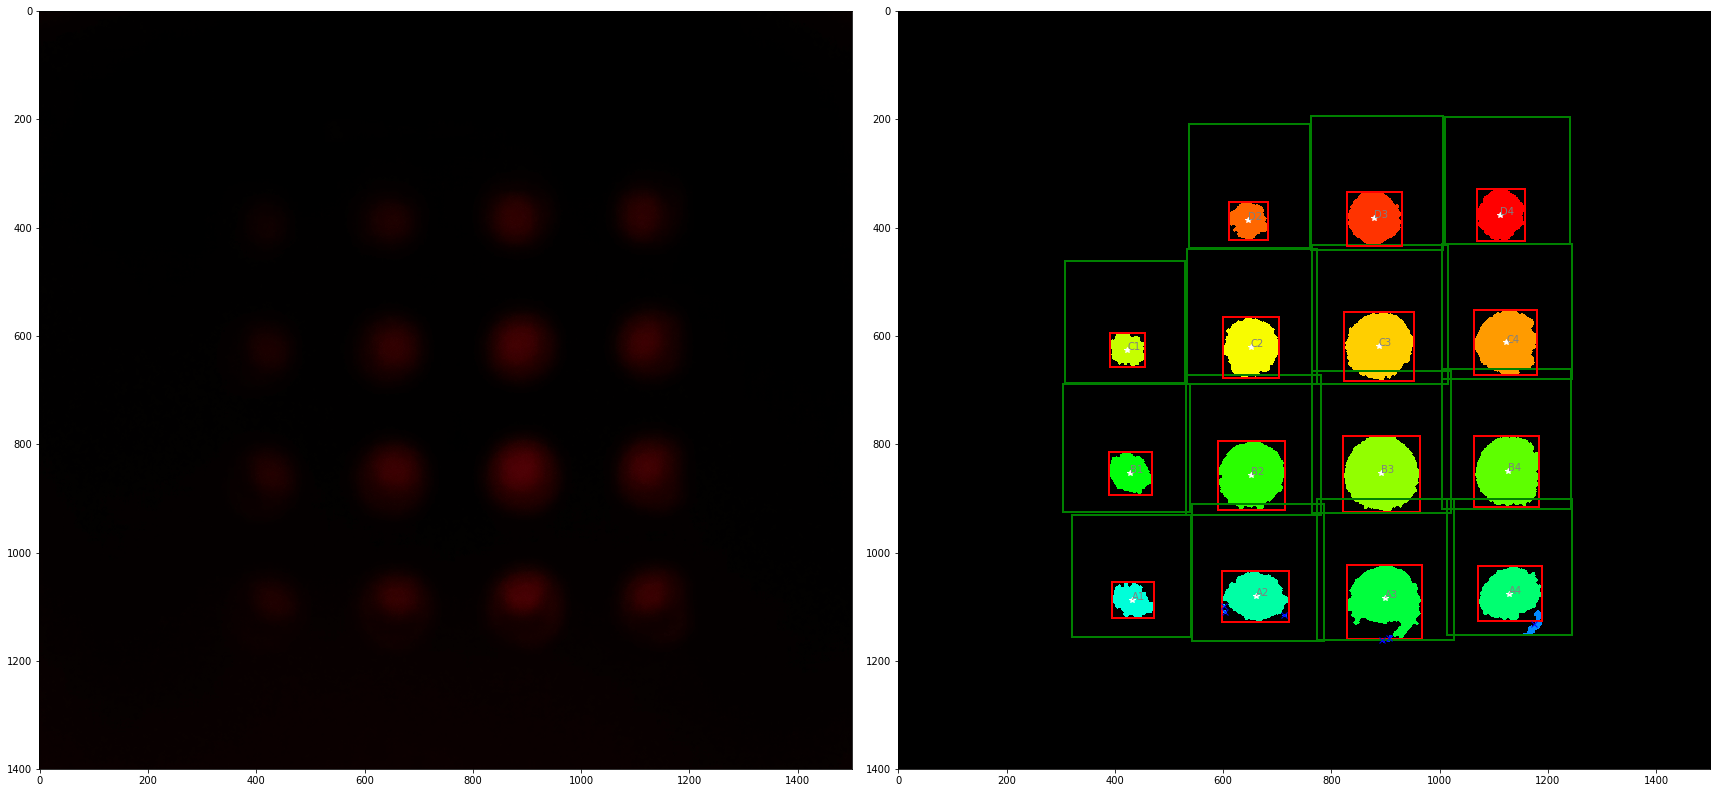

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(24, 24))
ax[0].imshow(im_li[1], interpolation='nearest', cmap=plt.cm.gray)
ax[1].imshow(im_labeled[1][1])
region_intensity_dict = {}
for key in sorted_region_key:
    region_obj = region_raw_dict[key]
    y, x = region_obj.centroid
    well = get_well_loc(x, y)
    if well is not None and well not in region_intensity_dict.keys():
        region_intensity_dict[well] = region_obj.mean_intensity 
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region_obj.bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        ax[1].add_patch(rect)
        ax[1].plot(x, y, color='white', marker='*')
        plt.text(x, y, well, color='gray')
    else:
        ax[1].plot(x, y, color='b', marker='x')
    if well is not None:
        a, b, c, d = well_location_dict[well]
        rect2 = matplotlib.patches.Rectangle((b, a), d - b, c - a, fill=False, edgecolor='green', linewidth=2)
        ax[1].add_patch(rect2)

plt.tight_layout()
plt.show()

In [181]:
region_intensity_dict

{'B3': 5.506468261947852,
 'B4': 4.492523899011357,
 'A3': 4.726093737174752,
 'C3': 4.792832678974188,
 'B2': 4.234622593286761,
 'C4': 4.257183499288763,
 'C2': 3.8136246786632393,
 'A4': 4.331099676917554,
 'A2': 4.0791019449158075,
 'D3': 3.9253469882765124,
 'D4': 3.7761692650334076,
 'B1': 3.154271241077596,
 'D2': 2.981981981981982,
 'A1': 3.039307714872397,
 'C1': 2.80609511051574}

# Read image files

In [182]:
import pathlib

In [195]:
im_dir = pathlib.Path('F:/device/optics/32w_Realtime_test_5th/1')

In [196]:
im_dir

WindowsPath('F:/device/optics/32w_Realtime_test_5th/1')

In [198]:
im_li = []
for c in range(45):
    for t in range(2):
        fpath = im_dir/f'{c}_{t}_3.jpg'
        im_li.append(np.array(Image.open(fpath)))

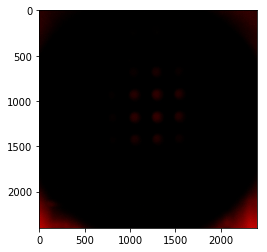

In [199]:
plt.imshow(im_li[-1])